<a href="https://colab.research.google.com/github/naidu1997/python-project1/blob/main/Random_forest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv('/content/archive (10).zip')

In [8]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
data.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [12]:
data.shape

(1727, 7)

In [14]:
#rename the columns
col_names= ['Buying','Maint','Doors','Persons','Lug_boot','Safety','Class']
data.columns= col_names

In [16]:
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   object
 3   Persons   1727 non-null   object
 4   Lug_boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [22]:
data.isna().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
Class       0
dtype: int64

In [24]:
#now we have to check the frequency checks of categorical variables
col_names= ['Buying','Maint','Doors','Persons','Lug_boot','Safety','Class']
for i in col_names:
  print(data[i].value_counts())

Buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
Persons
4       576
more    576
2       575
Name: count, dtype: int64
Lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
Safety
med     576
high    576
low     575
Name: count, dtype: int64
Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [58]:
data['Class'].value_counts()

Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [60]:
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


<Axes: xlabel='Doors', ylabel='Persons'>

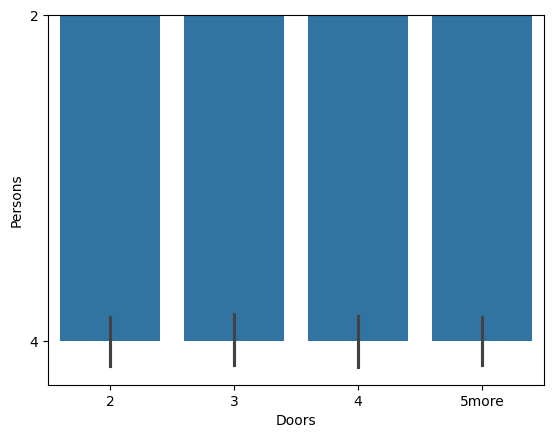

In [62]:
#data visualization
sns.barplot(data= data,x="Doors",y="Persons")

<Axes: xlabel='Safety', ylabel='Lug_boot'>

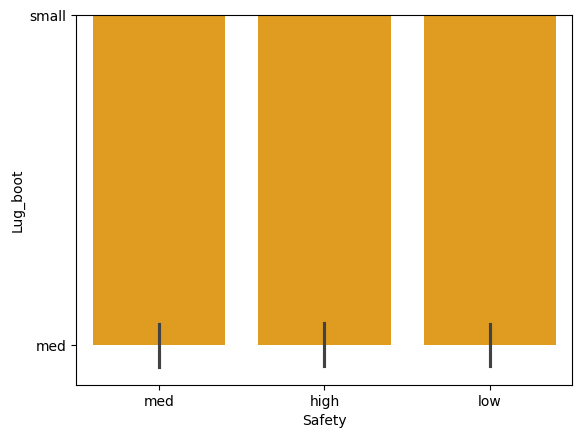

In [65]:
sns.barplot(data= data,color='orange',x="Safety",y="Lug_boot")

<Axes: xlabel='Safety', ylabel='Lug_boot'>

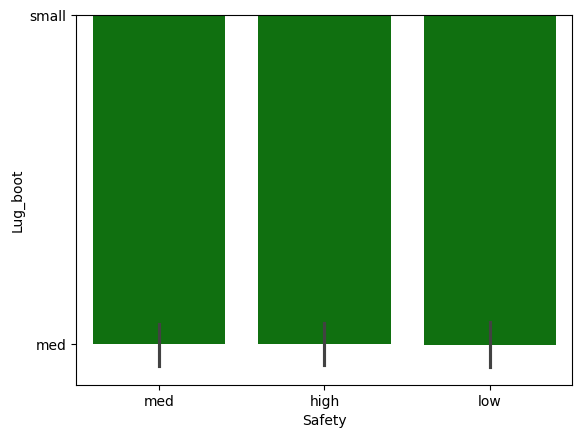

In [72]:
sns.barplot(data= data,color='green',x="Safety",y="Lug_boot")

<Axes: xlabel='Doors', ylabel='Persons'>

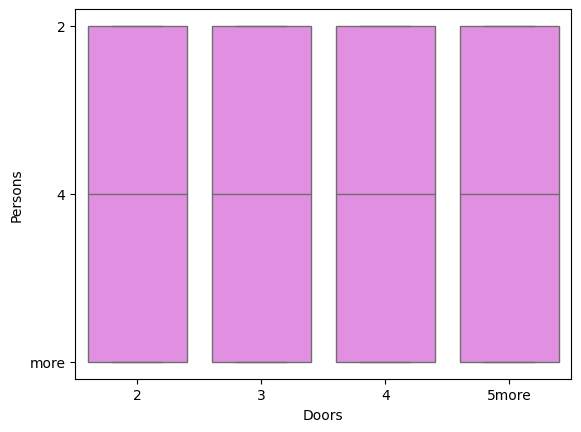

In [74]:
sns.boxplot(data= data,color='violet',x="Doors",y="Persons")

<Axes: xlabel='Safety', ylabel='Class'>

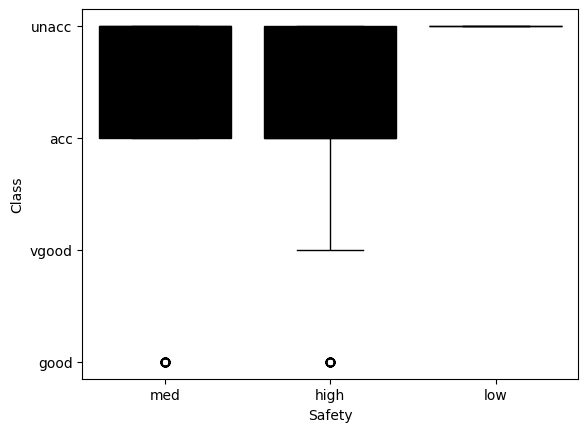

In [80]:
sns.boxplot(data= data,color='black',x="Safety",y="Class")

In [ ]:
sns.boxplot(data= data,color='red',x="Safety",y="Lug_boot")

In [28]:
x= data.drop(['Class'],axis=1)
y= data['Class']

In [30]:
#split data into traing and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
#check the shape of x_train and x_test
x_train.shape,x_test.shape

((1381, 6), (346, 6))

In [35]:
#check the datatypes in x_train
x_train.dtypes

Buying      object
Maint       object
Doors       object
Persons     object
Lug_boot    object
Safety      object
dtype: object

In [38]:
x_train.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [45]:
#import category encoder
!pip install category_encoders # Use the correct command to install the module
import category_encoders as ce

In [47]:
#encode categorical variables with ordinal encoding
encoder= ce.OrdinalEncoder(cols=['Buying','Maint','Doors','Persons','Lug_boot','Safety'])

In [49]:
x_train= encoder.fit_transform(x_train)
x_test= encoder.transform(x_test)

In [51]:
x_train.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [53]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#instantiate the classifier
rfc= RandomForestClassifier(random_state=42)
#fit the model
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [55]:
#predict the test set results
y_pred= rfc.predict(x_test)

In [57]:
#check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-tree :{0:0.4}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with 10 decision-tree :0.9509
